# **Big Sales Prediction using Random Forest Regression**
---

**Objective**

The Objective of the project is to import Sales Data that has thousands of entries, transform it to a usable format (CSV), pre-process it to make it error-free such that it becomes machine-friendly and use a suitable Machine Learning Model (in this case, Random Forest Regression)

---
**Importing Panda Library**

In [1]:
import pandas as pd

---
**Importing/Reading Data from Soruce**

In [2]:
Sales = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv")

---
**Inspecting and Describing Data**

In [6]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [14]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.3+ MB


In [15]:
Sales.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.353351,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.478027,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.000000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.000000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,1.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,1.000000,0.328391,266.888400,2009.000000,31224.726950


In [12]:
Sales['Item_Weight'].fillna(Sales.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

In [17]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.3+ MB


---
# **Data Visualization**


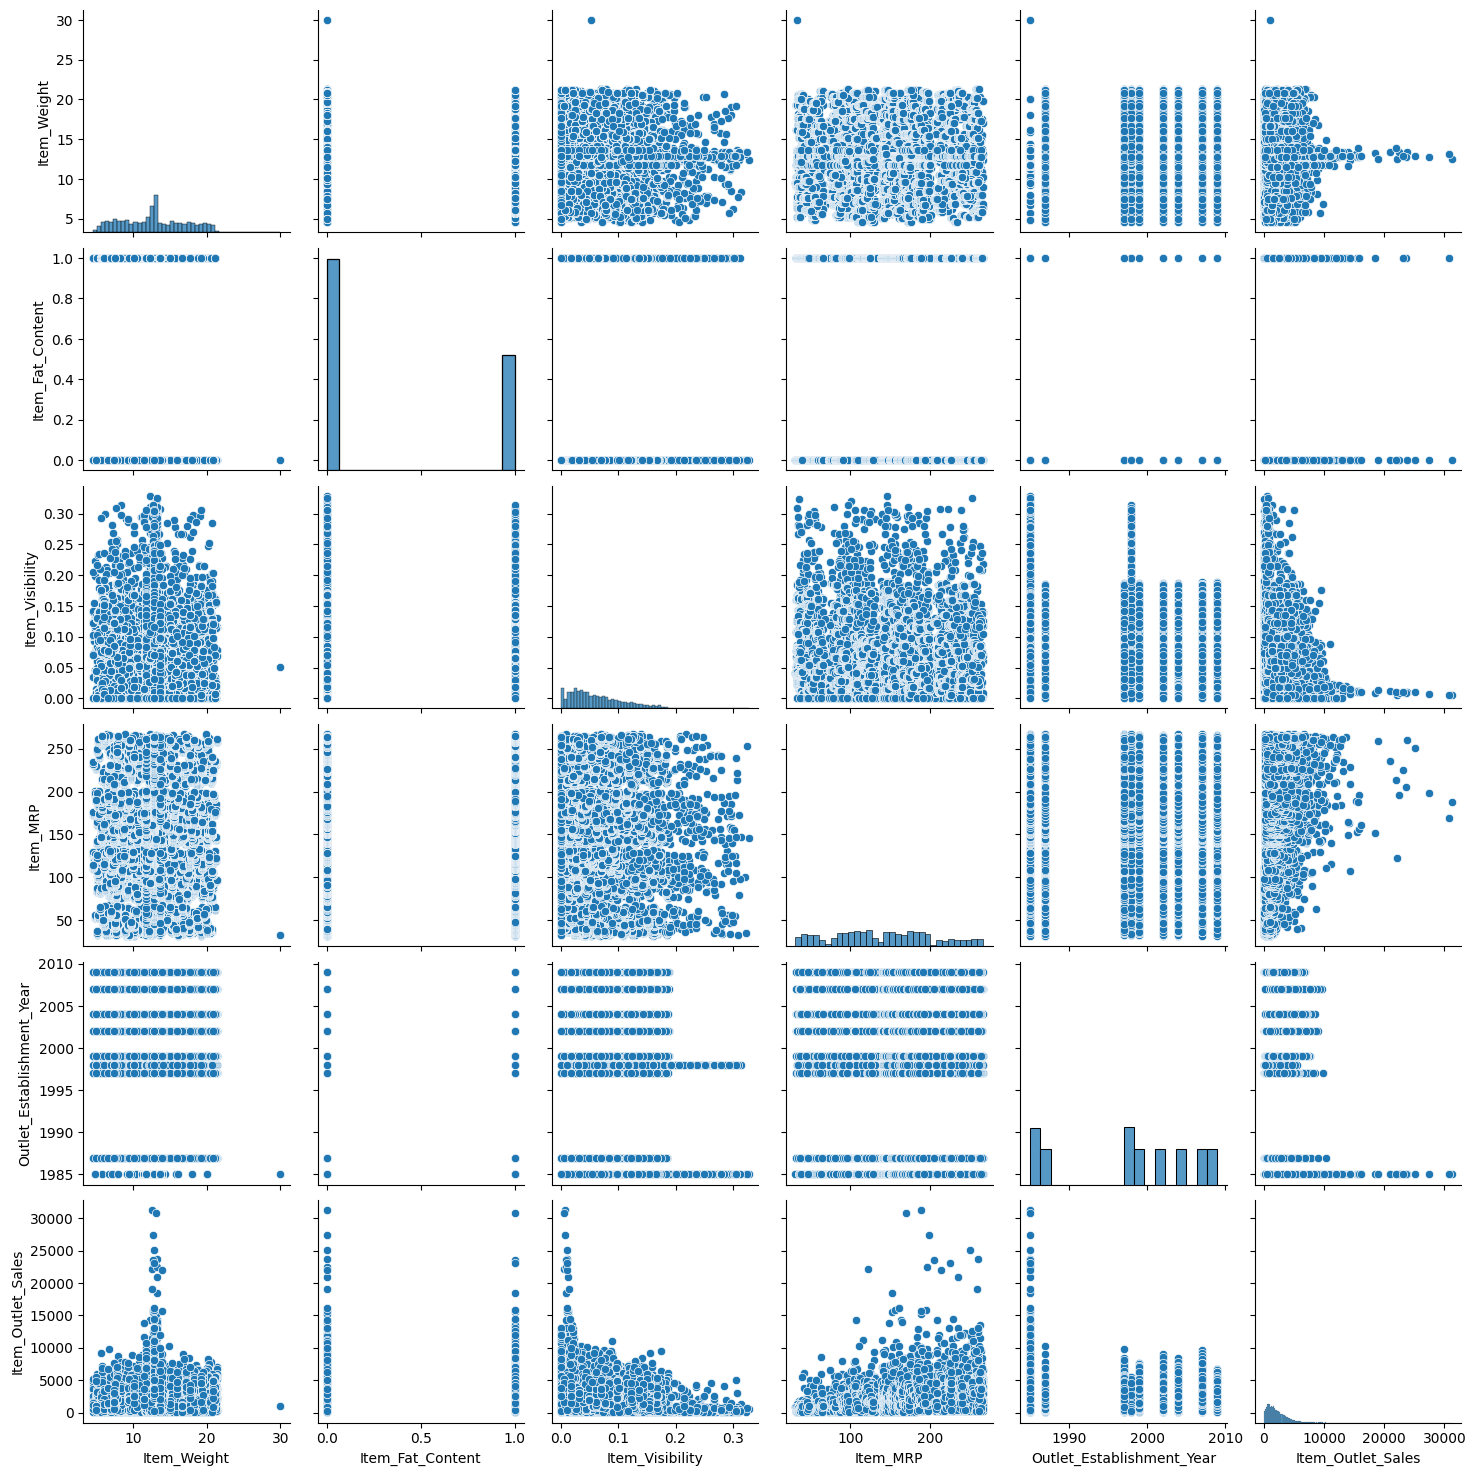

In [13]:
import seaborn as sns
sns.pairplot(Sales)

---
**Data Preprocessing (Cleaning up of Data)**

In [18]:
Sales[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [9]:
Sales[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
dtype: int64

In [8]:
Sales.replace({'Item_Fat_Content' : {'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}}, inplace = True)

In [10]:
Sales.replace({'Item_Fat_Content' : {'Low Fat' : 0, 'Regular' : 1}}, inplace = True)

In [19]:
Sales[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

In [25]:
Sales.replace({'Item_Type' : {'Fruits and Vegetables' : 0, 'Snack Foods' : 0, 'Household' : 1, 'Frozen Foods' : 0, 'Dairy' : 0, 'Baking Goods' : 0, 'Canned' : 0, 'Health and Hygiene' : 1, 'Meat' : 0, 'Soft Drinks' : 0, 'Breads' : 0, 'Hard Drinks' : 0, 'Others' : 2, 'Starchy Foods' : 0, 'Breakfast' : 0, 'Seafood' : 0}}, inplace=True)

In [26]:
Sales[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [27]:
Sales[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
dtype: int64

In [29]:
Sales.replace({'Outlet_Identifier' : {'OUT027' : 0, 'OUT013' : 1, 'OUT035' : 2, 'OUT046' : 3, 'OUT049' : 4, 'OUT045' : 5, 'OUT018' : 6, 'OUT017' : 7, 'OUT010' : 8, 'OUT019' : 9}}, inplace=True)

In [30]:
Sales[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [32]:
Sales[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
dtype: int64

In [52]:
Sales.replace({'Outlet_Size' : {'Medium' : 1, 'Small' : 0, 'High' : 2}}, inplace=True)

In [53]:
Sales[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [37]:
Sales[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
dtype: int64

In [39]:
Sales.replace({'Outlet_Location_Type' : {'Tier 3' : 2, 'Tier 2' : 1, 'Tier 1': 0}}, inplace=True)

In [40]:
Sales[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [41]:
Sales[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [42]:
Sales.replace({'Outlet_Type' : {'Grocery Store' : 0, 'Supermarket Type1' : 1, 'Supermarket Type2' : 2, 'Supermarket Type3' : 3}}, inplace=True)

In [43]:
Sales[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
dtype: int64

In [44]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


---
**Defining Target Variable(y) and Independent Variables(X)**

In [63]:
y = Sales['Item_Outlet_Sales']
x = Sales[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In [64]:
y.shape
x.shape

(14204, 10)

Standardizing X Values

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()
x_std = Sales[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
x_std = sc.fit_transform(x_std)

In [67]:
x_std


array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [69]:
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]= pd.DataFrame(x_std, columns= [['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

<ipython-input-69-7bfba644472a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]= pd.DataFrame(x_std, columns= [['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


In [70]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,4,0.139681,1,0,1
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,2,0.736955,0,1,1
14200,0.002201,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.002201,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,0.204448,0,0.064694,0,1.973435,0,-1.532686,1,2,3


---
**Train Test Split**

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2529)

---
**Modelling**

In [74]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=2529)

In [75]:
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=2529)

Model Prediction

In [76]:
y_pred = RFR.predict(x_test)
y_pred.shape
y_pred

array([1359.9474462 ,  689.72111819, 1859.80846766, ..., 2212.31316446,
       3344.32295034,  509.40814628])

---
**Model Evaluation**

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
mean_squared_error(y_test, y_pred)

1613965.15465047

In [79]:
mean_absolute_error(y_test, y_pred)

827.783002565394

In [80]:
r2_score(y_test, y_pred)

0.5799088331861746

---
**Data Prediction**

In [81]:
import matplotlib.pyplot as plt

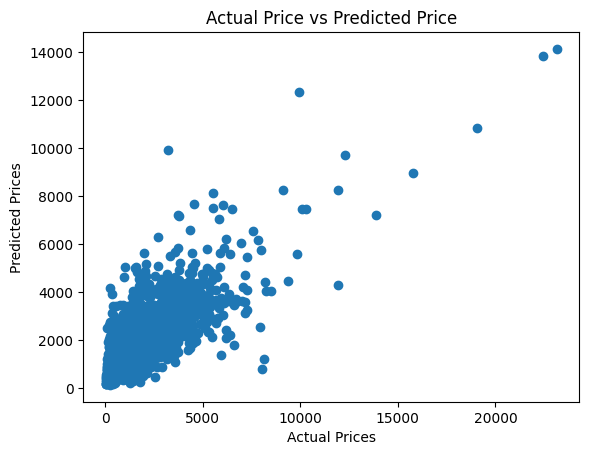

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()


---
**Explanation**

As with most real-world scenarios, the dataset we received isn't fully complete. As such we need to apply certain operations to make it more machine-friendly, 

* **Importing:** The Machine cannot read raw data directly, the data used by the machine in stored in the form of "Data Frames", these Data Frames can be derived from files like CSV, XLSX, HTML, CSS etc... 
* **Identifying:** The next step is to identify important data that can be used in the final Machine Learning model, this involves pre-selection of columns that may be further used as Independent Variables(X) or Target Variable(y)
* **Transforming:** The machine cannot understand character values such as "Low", "Medium" etc... this has to be converted into a format that is easier for the machine to understand like "0", "1", "2" etc... 
* **Splitting:** Once the data is ready for the machine, we split the data into two categories for two different purposes: "Train" data and "Test" data, this is for us to compare the accuracy of the final model, this is usually split into a 7:3 ratio. 
* **Prediction and Results:** Last step is to use the test data and prediced data to check accuracy and see if it satisfies the client.